# Lab02: Working with Time Series


## 1. Thu thập dữ liệu

- Ngữ cảnh để nhóm chúng em tìm kiếm dữ liệu này:
- Chủ đề dữ liệu:
- Nguồn dữ liệu:
- License của dữ liệu:
- Phương pháp để thu thập dữ liệu này:


## 2. Tiền xử lý dữ liệu

#### Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#### Đọc dữ liệu từ file CSV

In [2]:
df = pd.read_csv("./../datasets/weekly_fuel_prices_all_data_from_2005_to_20221102.csv",sep=";")

#### In 5 dòng dữ liệu đầu tiên

In [3]:
df.head()

,SURVEY_DATE,PRODUCT_ID,PRODUCT_NAME,PRICE,VAT,EXCISE,NET,CHANGE
0,2005-01-03,1,Euro-Super 95,1115.75,185.96,558.64,371.15,-1.57
1,2005-01-03,2,Automotive gas oil,1018.28,169.71,403.21,445.36,-0.33
2,2005-01-03,3,Heating gas oil,948.50,158.08,403.21,387.21,-22.55
3,2005-01-03,5,LPG,552.50,92.08,156.62,303.80,0.22
4,2005-01-03,6,Residual fuel oil,553.25,50.30,166.84,336.11,-12.21


#### Thông tin số dòng và số cột

In [4]:
df.shape

(5358, 8)

 -> Bộ dữ liệu có 5358 dòng và 8 cột

### 2.1. Mỗi dòng có ý nghĩa gì? ? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng dữ liệu cho biết thông tin xăng dầu theo ngày của mỗi loại xăng ở Ý, cụ thể: giá xăng, vat,...

Tất cả các dòng dữ liệu có ý nghĩa hoàn toàn giống nhau và không có ngoại lệ. 

### 2.2. Mỗi cột có ý nghĩa gì?


In [5]:
df.columns

Index(['SURVEY_DATE', 'PRODUCT_ID', 'PRODUCT_NAME', 'PRICE', 'VAT', 'EXCISE',
       'NET', 'CHANGE'],
      dtype='object')

- Cột `SURVEY_DATE` là ngày thực hiện khảo sát
- Cột `PRODUCT_ID` là mã số của từng loại xăng dầu 
- Cột `PRODUCT_NAME` là tên của loại xăng dầu
- Cột `PRICE` là giá xăng dầu
- Cột `VAT` là thuế giá trị gia tăng VAT
- Cột `EXCISE`là thuế tiêu thụ đặc biệt Excise
- Cột `NET` là giá trị thực tế của xáng dầu sau khi loại bỏ các khoản thuế.
- Cột `CHANGE` là khoảng thay đổi của giá xăng dầu

### 2.3. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [6]:
df.dtypes

SURVEY_DATE      object
PRODUCT_ID        int64
PRODUCT_NAME     object
PRICE           float64
VAT             float64
EXCISE          float64
NET             float64
CHANGE          float64
dtype: object

- Dữ liệu ở các cột `SURVEY_DATE`, `PRODUCT_NAME` thuộc kiểu non-numeric
- Dữ liệu ở các cột `PRODUCT_ID` thuộc kiểu số nguyên
- Dữ liệu ở các cột `PRICE`, `VAT`, `EXCISE`, `NET`, `CHANGE` thuộc kiểu số thực

### 2.4. Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?

#### Phân bố của dữ liệu ở cột `PRICE`

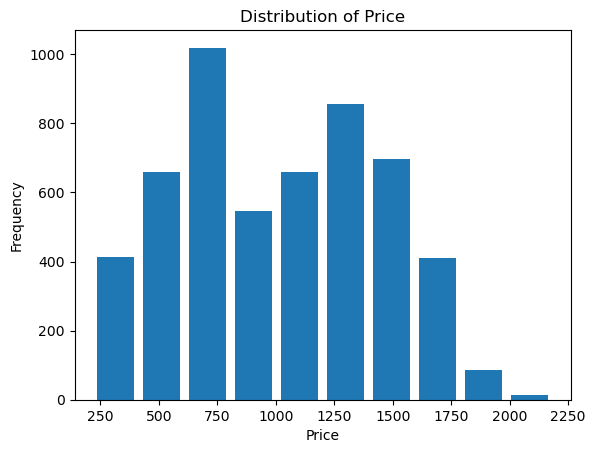

In [7]:
plt.hist(df['PRICE'], bins=10, rwidth=0.8)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

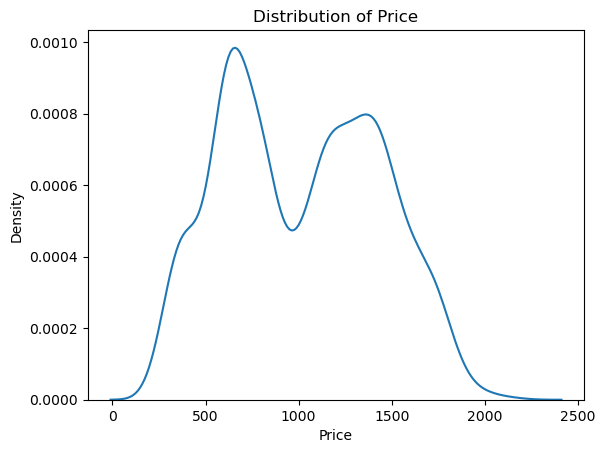

In [8]:
sns.kdeplot(df['PRICE'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

#### Phân bố của dữ liệu ở cột `VAT`

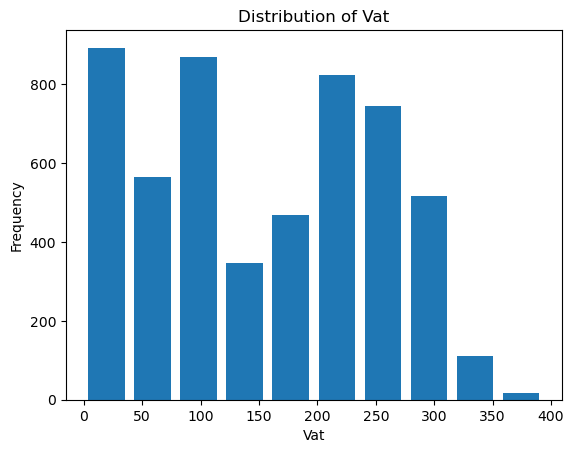

In [9]:
plt.hist(df['VAT'], bins=10, rwidth=0.8)
plt.title('Distribution of Vat')
plt.xlabel('Vat')
plt.ylabel('Frequency')
plt.show()

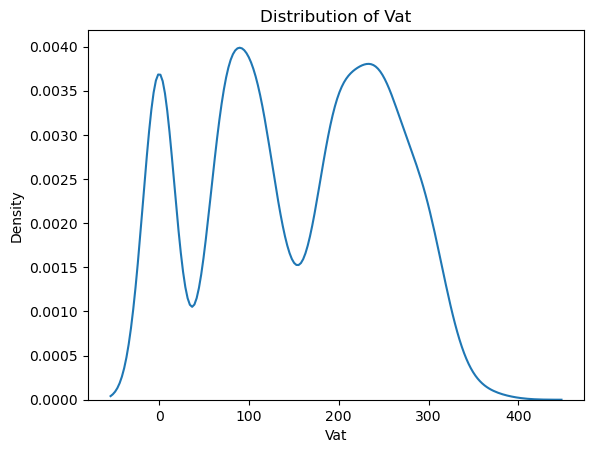

In [10]:
sns.kdeplot(df['VAT'])
plt.title('Distribution of Vat')
plt.xlabel('Vat')
plt.show()

#### Phân bố của dữ liệu ở cột `EXCISE`

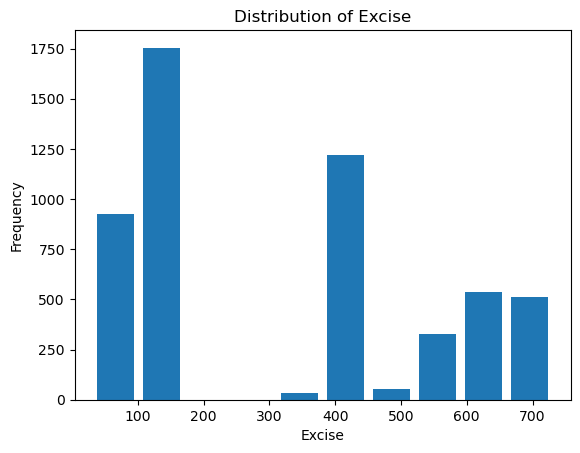

In [11]:
plt.hist(df['EXCISE'], bins=10, rwidth=0.8)
plt.title('Distribution of Excise')
plt.xlabel('Excise')
plt.ylabel('Frequency')
plt.show()

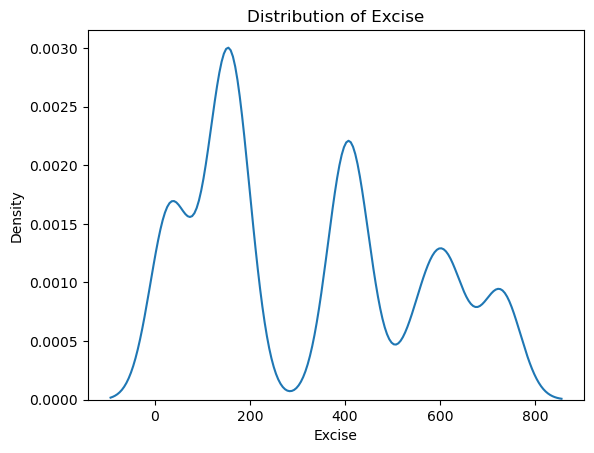

In [12]:
sns.kdeplot(df['EXCISE'])
plt.title('Distribution of Excise')
plt.xlabel('Excise')
plt.show()

#### Phân bố của dữ liệu ở cột `NET`

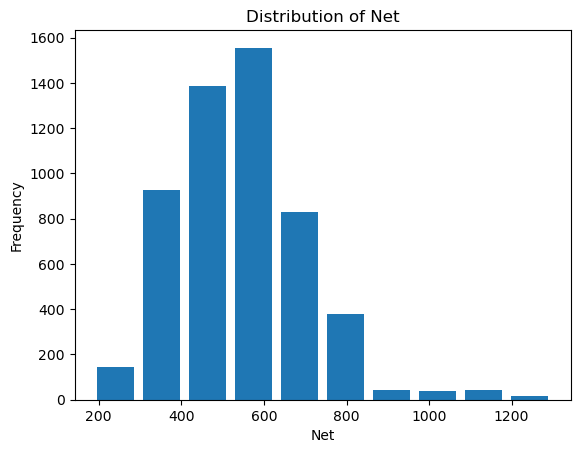

In [13]:
plt.hist(df['NET'], bins=10, rwidth=0.8)
plt.title('Distribution of Net')
plt.xlabel('Net')
plt.ylabel('Frequency')
plt.show()

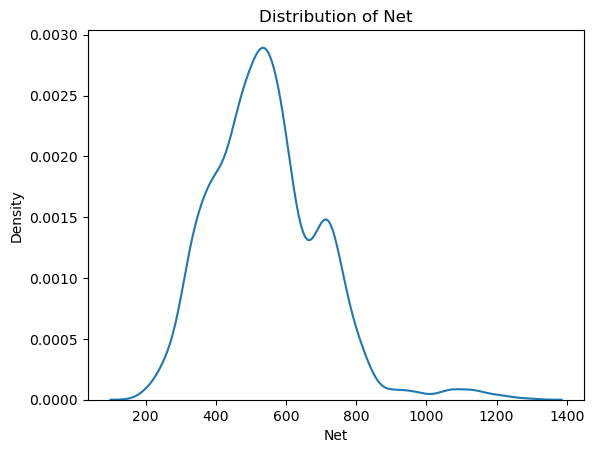

In [14]:
sns.kdeplot(df['NET'])
plt.title('Distribution of Net')
plt.xlabel('Net')
plt.show()

#### Phân bố của dữ liệu ở cột `CHANGE`

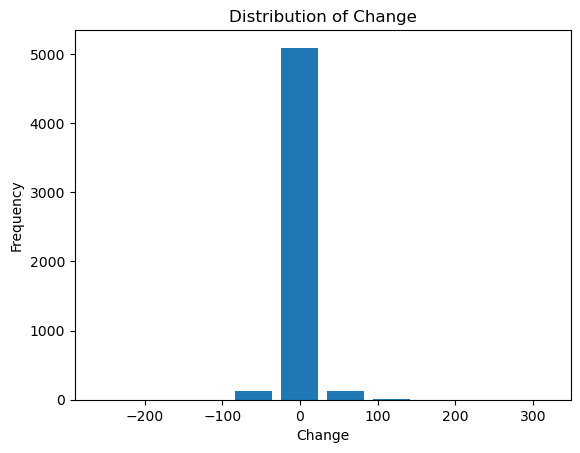

In [15]:
plt.hist(df['CHANGE'], bins=10, rwidth=0.8)
plt.title('Distribution of Change')
plt.xlabel('Change')
plt.ylabel('Frequency')
plt.show()

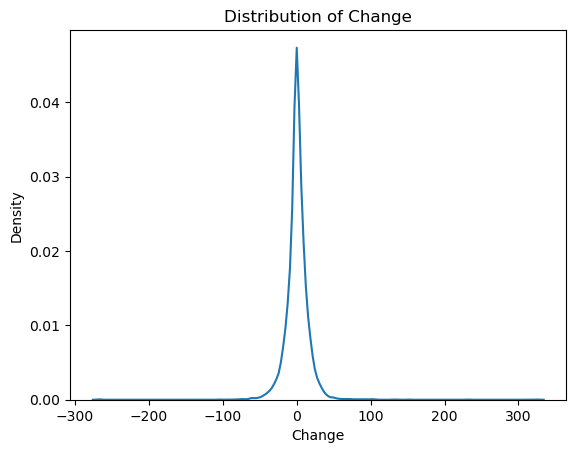

In [16]:
sns.kdeplot(df['CHANGE'])
plt.title('Distribution of Change')
plt.xlabel('Change')
plt.show()

#### Phân bố của dữ liệu ở cột `PRODUCE_NAME`

In [17]:
value_counts = df['PRODUCT_NAME'].value_counts()
percentages = (value_counts / len(df)) * 100

print(percentages)

Euro-Super 95         16.666667
Automotive gas oil    16.666667
Heating gas oil       16.666667
LPG                   16.666667
Residual fuel oil     16.666667
Heavy fuel oil        16.666667
Name: PRODUCT_NAME, dtype: float64


### 2.5. Có cần phải tiền xử lý dữ liệu hay không và nếu có thì nhóm sinh viên cần phải xử lý như thế nào?

#### Kiểm tra các cột bị mất dữ liệu

In [18]:
# find missing values
df.isnull().sum()

SURVEY_DATE     0
PRODUCT_ID      0
PRODUCT_NAME    0
PRICE           0
VAT             0
EXCISE          0
NET             0
CHANGE          0
dtype: int64

Không có cột nào bị mất dữ liệu

#### Chuyển cột `SURVEY_DATE` sang kiểu datetime

In [19]:
# convert survey date column to datetime
df['SURVEY_DATE'] = pd.to_datetime(df['SURVEY_DATE'])

Kiểm tra lại dữ liệu

In [20]:
df.dtypes

SURVEY_DATE     datetime64[ns]
PRODUCT_ID               int64
PRODUCT_NAME            object
PRICE                  float64
VAT                    float64
EXCISE                 float64
NET                    float64
CHANGE                 float64
dtype: object

#### Nhận xét:

Dữ liệu không xuất hiện việc mất giá trị, các cột ngoài cột `SURVEY_DATE` trong Dataframe không cần phải xử lý thêm.

## 3. Khám phá mối quan hệ trong dữ liệu

Chúng ta sẽ khám phá các mối quan hệ trong dữ liệu bằng cách đưa ra những câu hỏi và trả lời.

### 3.1. Đặt câu hỏi

**1. Câu hỏi 1:**

**2. Câu hỏi 2:**

**3. Câu hỏi 3:**

**4. Câu hỏi 4:**

**5. Câu hỏi 5:**

**6. Câu hỏi 6:**

**7. Câu hỏi 7:**

**8. Câu hỏi 8:**


### 3.2. Trả lời câu hỏi

#### **Câu hỏi 1:** lorem ipsum dolor sir almet...

#### **Câu hỏi 2:** lorem ipsum dolor sir almet...

#### **Câu hỏi 3:** lorem ipsum dolor sir almet...